In [13]:
import numpy as np
from sklearn.datasets import fetch_california_housing

In [14]:
dataset = fetch_california_housing()

In [15]:
x = dataset.data
y = dataset.target

## Lineare Regression

### Bedeutung

-   $R^2$: Wie viel Streuung kann von dem Regressionsmodell erklärt werden
-   coef: Steigung der Geraden
-   intercept: y-Achsenabschnitt

### Symbole

-   $\hat{y}$: Prediktion vom Modell

### Datensatz

-   $N$: Anzahl an Samples
-   $F$: Anzahl an Features
-   $x$: Input-Daten (Features)
-   $y$: Output Daten (Targets)

### Variablen

-   $x \in \mathbb{R}^{N,F}$
-   $y \in \mathbb{R}^{N}$
-   coef, $\bar{x} \in \mathbb{R}^{F}$
-   intercept, $\bar{y} \in \mathbb{R^1}$

### Formeln

-   $\beta = (X^TX)^{-1}X^Ty$
-   coef = $\beta$\[1:\]
-   intercept = $\beta$\[0\]
-   $\hat{y} = X\beta$
-   $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$

### Shapes

-   inner: $(F,N) * (N,F) => (F,F)$
-   inv: (F,F)$^{-1}$ => (F,F)
-   inner2: (F,F) \* (F,N) => (F,N)
-   $\beta$: (F,N) \* (N,1) => (F,1)


In [16]:
from sklearn.metrics import r2_score

In [17]:
class LinearRegression:
    """
    Linear regression model.

    Parameters:
    - use_intercept (bool): Whether to include an intercept term in the model.

    Attributes:
    - coef_ (np.ndarray or None): Coefficients of the linear regression model.
    None before fitting the model.
    - intercept_ (np.ndarray or None): Intercept term of the linear regression
    model. None before fitting the model.
    - use_intercept (bool): Whether to include an intercept term in the model.

    Methods:
    - fit(x, y): Fit the linear regression model to the training data.
    - predict(x): Predict the target variable for new input data.
    - score(x, y): Calculate the coefficient of determination (R^2) of the model.
    """

    def __init__(self, use_intercept: bool = True) -> None:
        self.coef_: np.ndarray | None = None
        self.intercept_: np.ndarray | None = None
        self.use_intercept = use_intercept

    def _add_intercept(self, x: np.ndarray) -> np.ndarray:
        """
        Add an intercept term to the input data.

        Parameters:
        - x (np.ndarray): Input data.

        Returns:
        - np.ndarray: Input data with an intercept term added.
        """
        intercepts = np.ones(shape=(x.shape[0]))
        return np.column_stack((intercepts, x))

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the linear regression model to the training data.

        Parameters:
        - x (np.ndarray): Input data.
        - y (np.ndarray): Target variable.

        Returns:
        - None
        """
        if self.use_intercept:
            x = self._add_intercept(x)
        inner = np.dot(x.T, x)
        inv = np.linalg.inv(inner)
        beta = np.dot(np.dot(inv, x.T), y)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, x: np.ndarray) -> None:
        """
        Predict the target variable for new input data.

        Parameters:
        - x (np.ndarray): Input data.

        Returns:
        - np.ndarray: Predicted target variable.
        """
        return x * self.coef_ + self.intercept_

    def score(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Calculate the coefficient of determination (R^2) of the model.

        Parameters:
        - x (np.ndarray): Input data.
        - y (np.ndarray): Target variable.

        Returns:
        - float: Coefficient of determination (R^2).
        """
        y_pred = self.predict(x)
        return r2_score(y, y_pred)

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
x = dataset.data[:, [0]]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2 = regr.score(x_test, y_test)

print(f"r2: {r2}")
print(f"m: {regr.coef_}")
print(f"b: {regr.intercept_}")

r2: 0.45106137063666885
m: [0.41915538]
b: 0.4485307596587021


In [21]:
def plot_regressor(
    x: np.ndarray,
    y: np.ndarray,
    regr: LinearRegression,
) -> None:
    x_values = np.arange(start=0.0, stop=14.0, step=0.05).reshape((-1, 1))
    y_values = regr.predict(x_values)

    plt.scatter(x, y)
    plt.plot(x_values, y_values, color="red")
    plt.show()

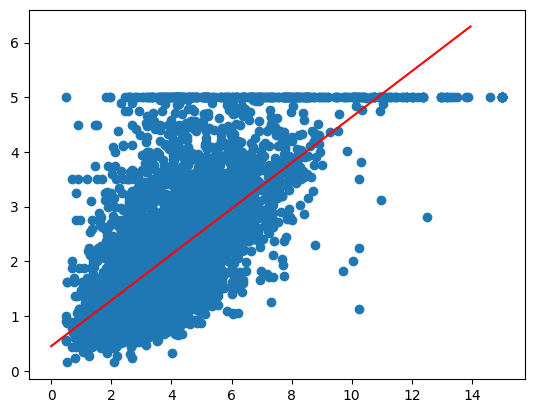

In [22]:
plot_regressor(x_test, y_test, regr)

In [23]:
def plot_residuals(
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
    regr: LinearRegression,
) -> None:
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    plt.scatter(
        y_pred_train,
        y_pred_train.flatten() - y_train,
        s=10,
        color="blue",
    )
    plt.scatter(y_pred_test, y_pred_test.flatten() - y_test, s=10, color="red")
    plt.hlines(y=0.0, xmin=0.0, xmax=7.0)
    plt.legend(["Train", "Test"])
    plt.show()

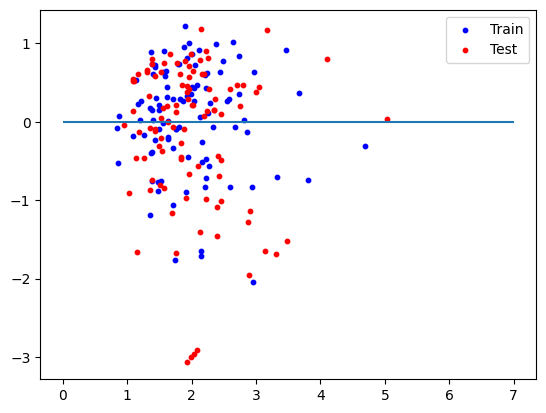

In [24]:
plot_residuals(x_train[:100], y_train[:100], x_test[:100], y_test[:100], regr)